<ipython-input-2-3be321fd22f5>:21: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


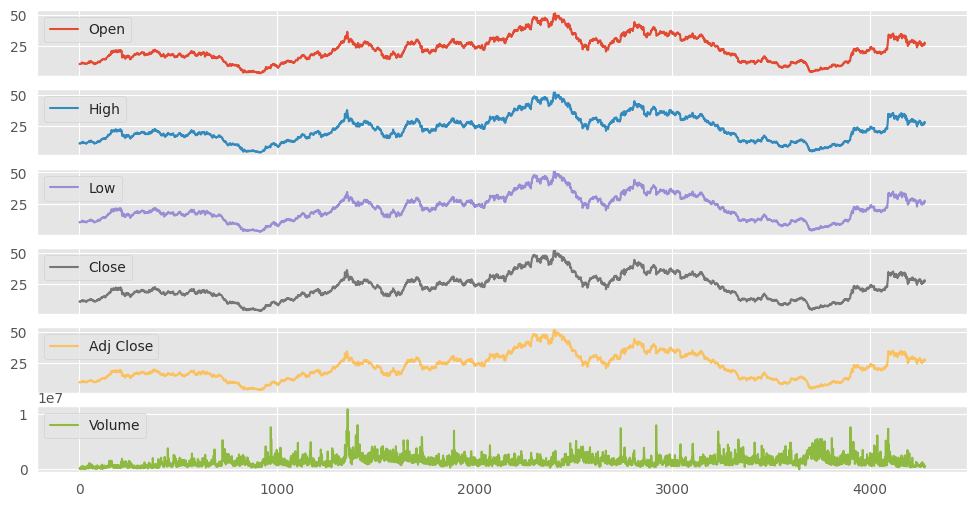

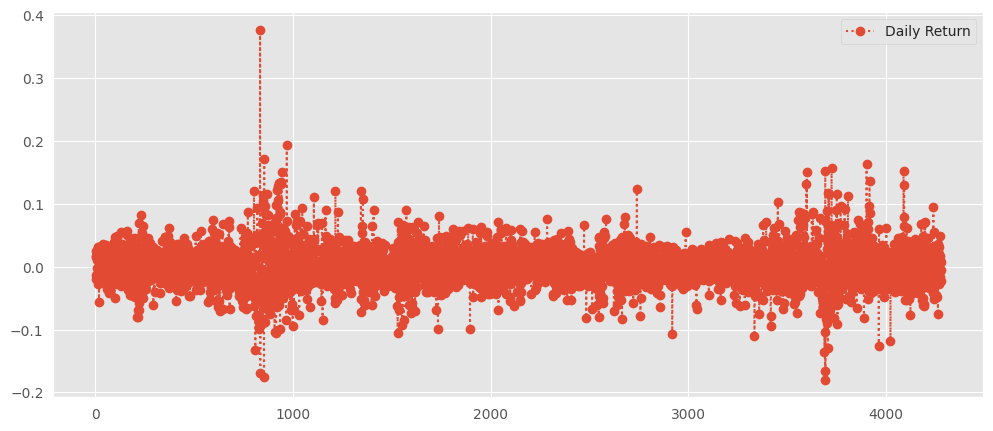

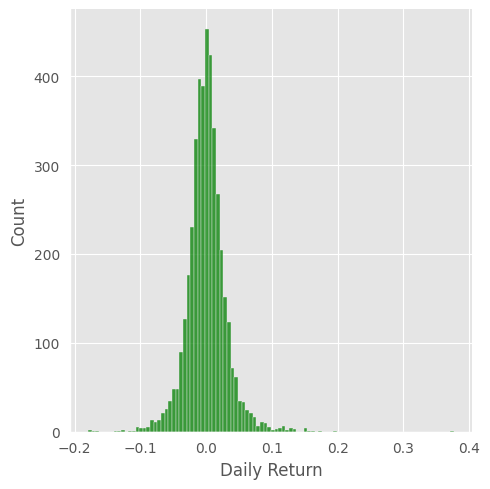

            Date       Open       High        Low      Close  Adj Close  \
0     2005-07-13  10.620000  10.640000  10.510000  10.600000   9.197446   
1     2005-07-14  10.500000  10.500000  10.330000  10.390000   9.015231   
2     2005-07-15  10.500000  10.650000  10.500000  10.550000   9.154059   
3     2005-07-18  10.720000  10.740000  10.660000  10.720000   9.301566   
4     2005-07-19  10.800000  11.030000  10.800000  10.990000   9.535840   
...          ...        ...        ...        ...        ...        ...   
4274  2022-07-06  26.180000  26.570000  26.129999  26.420000  26.420000   
4275  2022-07-07  27.200001  27.879999  27.200001  27.700001  27.700001   
4276  2022-07-08  27.750000  28.090000  27.690001  27.900000  27.900000   
4277  2022-07-11  27.450001  27.540001  27.219999  27.260000  27.260000   
4278  2022-07-12  26.940001  27.420000  26.860001  27.129999  27.129999   

      Volume  MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0     136500         

,count,mean,std,min,25%,50%,75%,max
Open,4279.0,2.237445e+01,10.299331,3.170000,14.695000,2.099000e+01,2.935500e+01,5.126000e+01
High,4279.0,2.261316e+01,10.374618,3.410000,14.900000,2.123000e+01,2.972000e+01,5.180000e+01
Low,4279.0,2.210889e+01,10.228782,3.050000,14.505000,2.079000e+01,2.910000e+01,5.065000e+01
Close,4279.0,2.236894e+01,10.297576,3.140000,14.725000,2.103000e+01,2.940500e+01,5.147000e+01
Adj Close,4279.0,2.180599e+01,10.523917,2.907577,13.620653,2.040992e+01,2.913283e+01,5.144851e+01
Volume,4279.0,1.477393e+06,939806.962446,0.000000,859950.000000,1.268200e+06,1.866100e+06,1.085910e+07
MA for 10 days,4270.0,2.237635e+01,10.272470,3.431000,14.929250,2.105700e+01,2.942575e+01,5.049200e+01
MA for 50 days,4230.0,2.240954e+01,10.160409,3.923000,14.842600,2.094870e+01,2.936840e+01,4.794400e+01
MA for 100 days,4180.0,2.244370e+01,10.007586,4.185200,14.874300,2.111810e+01,2.856793e+01,4.625290e+01
Daily Return,4278.0,6.706601e-04,0.030194,-0.179845,-0.014925,0.000000e+00,1.499347e-02,3.764706e-01


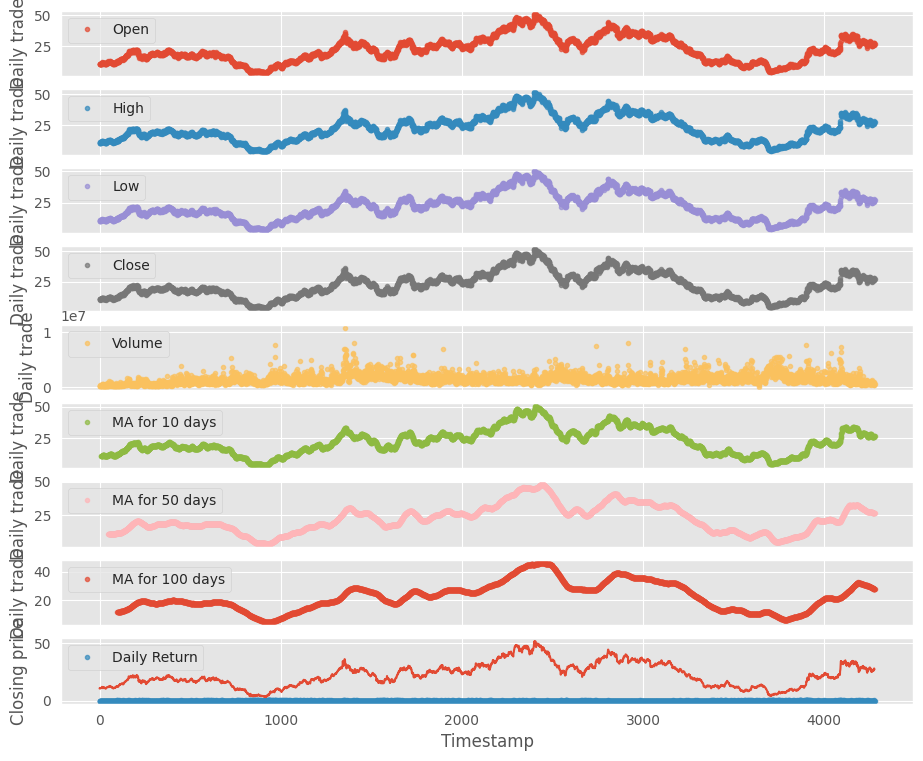

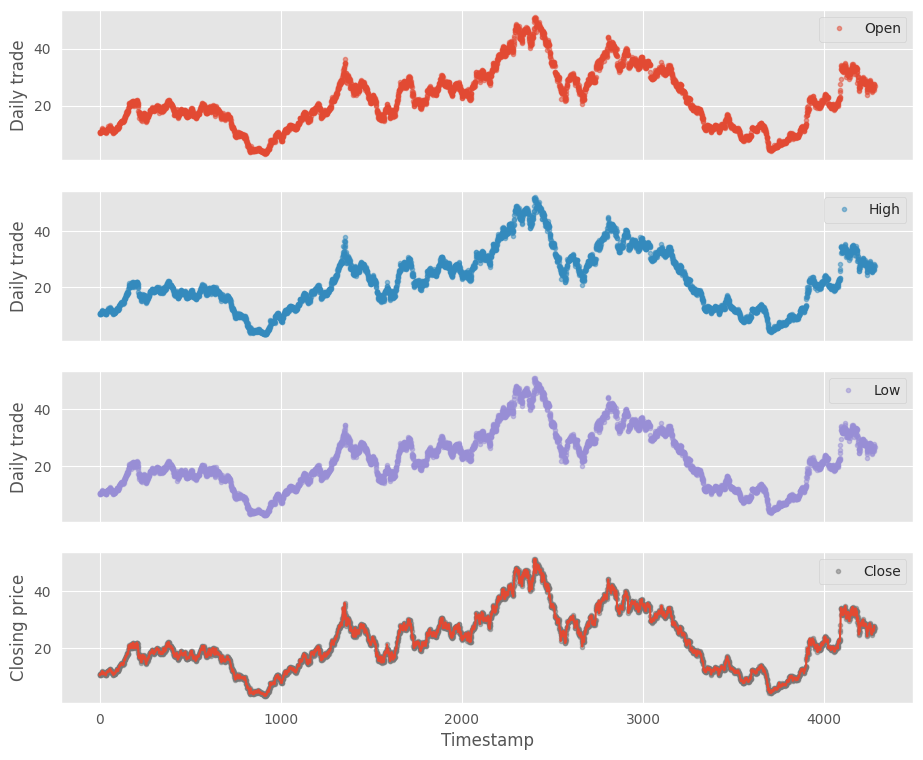

In [ ]:
# Imports
import numpy as np
import pandas as pd
import os
import math
import seaborn as sns
import datetime as dt
from datetime import datetime
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import requests
import csv
from tqdm import tqdm

# For data preprocessing and analysis part
data = pd.read_csv('TTM.csv')
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.plot(legend=True, subplots=True, figsize=(12, 6))
plt.show()

ma_day = [10, 50, 100]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = pd.DataFrame.rolling(data['Close'], ma).mean()

data['Daily Return'] = data['Close'].pct_change()

data['Daily Return'].plot(figsize=(12, 5), legend=True, linestyle=':', marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(), bins=100, color='green')
plt.show()

date = pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1 = closing_df1.rename(columns={"Close": "data_close"})
close2 = pd.concat([date, close1], axis=1)
close2.head()

data.nunique()

cols_plot = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days', 'Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

cols_plot = ['Open', 'High', 'Low', 'Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()